/var/folders/pv/088xlq6n437b0m1bfcy9zv840000gn/T/ipykernel_35372/481540389.py:47: RuntimeWarning: divide by zero encountered in power
  q = (wages ** (-0.5))


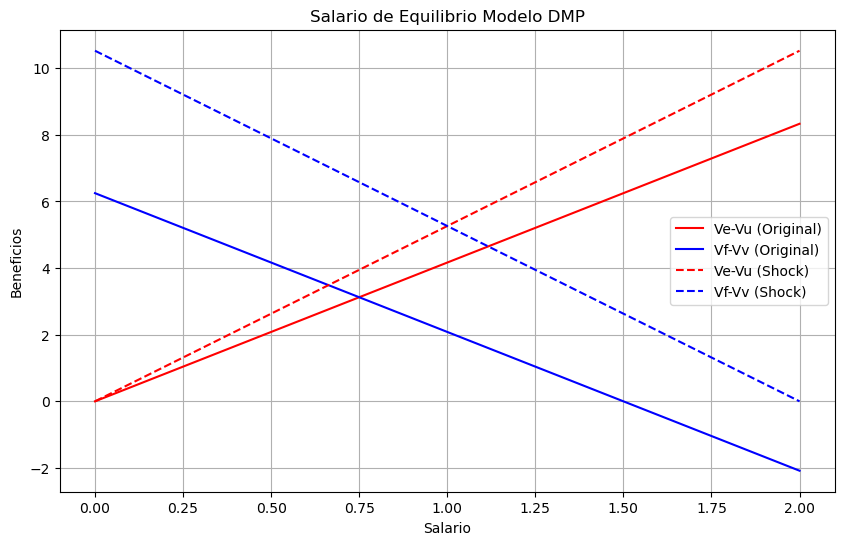

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fsolve
# Parámetros constantes
beta = 0.5
gamma = 1 - beta
K = 1
r = 0.04
b = 0.1
C = 1
L = 100

# Función para calcular el salario de equilibrio w
def calculate_w(A):
    return beta * (A + b) + (1 - beta) * C

# Función de equilibrio
def equilibrium_conditions(x, A, s):
    theta, u = x
    q_theta = theta ** (-0.5)
    w = calculate_w(A)
    eq1 = theta - (A - w) / (K * (r + q_theta))
    eq2 = s * u - theta * q_theta * (1 - u)
    return [eq1, eq2]

# Resolver el sistema de ecuaciones
def solve_equilibrium(A, s):
    initial_guess = [1, 0.1]
    theta_eq, u_eq = fsolve(equilibrium_conditions, initial_guess, args=(A, s))
    w_eq = calculate_w(A)
    return w_eq, theta_eq, u_eq

# Calcular los equilibrios originales y después del shock
A_original = 1.5
s_original = 0.1
A_shock = 2.0
s_shock = 0.05

w_original, theta_original, u_original = solve_equilibrium(A_original, s_original)
w_shock, theta_shock, u_shock = solve_equilibrium(A_shock, s_shock)

# Rango de salarios para el gráfico
wages = np.linspace(0, 2, 100)

# Calcular Ve - Vu y Vf - Vv para los salarios dados
def calculate_differences(wages, A, s):
    q = (wages ** (-0.5))
    Ve_Vu = wages / (s + b + r)
    Vf_Vv = (A - wages) / (s + b + r)
    return Ve_Vu, Vf_Vv

Ve_Vu_original, Vf_Vv_original = calculate_differences(wages, A_original, s_original)
Ve_Vu_shock, Vf_Vv_shock = calculate_differences(wages, A_shock, s_shock)

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(wages, Ve_Vu_original, 'r-', label='Ve-Vu (Original)')
plt.plot(wages, Vf_Vv_original, 'b-', label='Vf-Vv (Original)')
plt.plot(wages, Ve_Vu_shock, 'r--', label='Ve-Vu (Shock)')
plt.plot(wages, Vf_Vv_shock, 'b--', label='Vf-Vv (Shock)')

plt.xlabel('Salario')
plt.ylabel('Beneficios')
plt.title('Salario de Equilibrio Modelo DMP')
plt.legend()
plt.grid(True)
plt.show()

/var/folders/pv/088xlq6n437b0m1bfcy9zv840000gn/T/ipykernel_35372/1800173828.py:3: RuntimeWarning: divide by zero encountered in divide
  return (100 - E) / (0.1 * E)
/var/folders/pv/088xlq6n437b0m1bfcy9zv840000gn/T/ipykernel_35372/1800173828.py:22: RuntimeWarning: invalid value encountered in divide
  return -C + (alpha(E) / (a(E) + alpha(E) + 2*b + 2*r)) * A


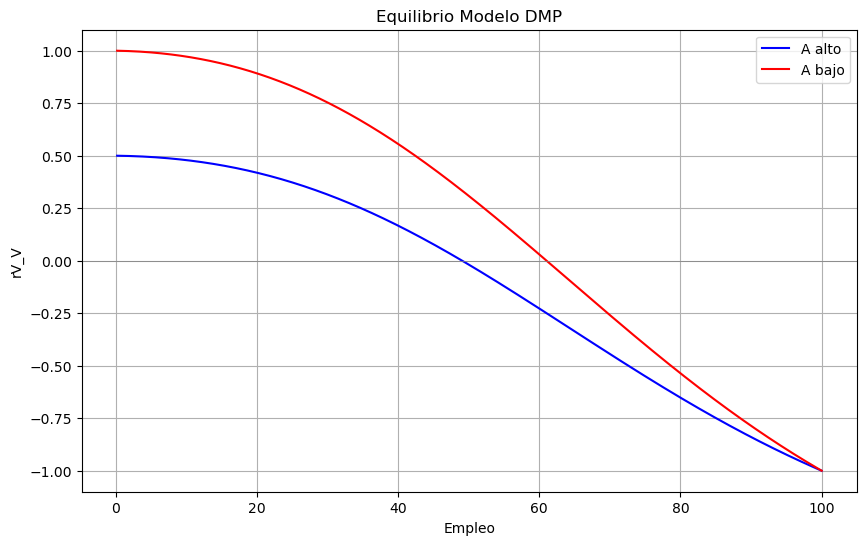

In [24]:
# Parámetros y funciones supuestas
def alpha(E):
    return (100 - E) / (0.1 * E) 

def a(E):
    return 0.1 * E /  

b = 0.1
r = 0.04
C = 1
E = 85

# Valores de A para alto y bajo
A_alto = 1.5
A_bajo = 2

# Valores de empleo
E = np.linspace(0, 100, 500)

# Función rV_V(E)
def rVV(E, A):
    return -C + (alpha(E) / (a(E) + alpha(E) + 2*b + 2*r)) * A

# Cálculo de rV_V(E) para A alto y A bajo
rVV_alto = rVV(E, A_alto)
rVV_bajo = rVV(E, A_bajo)

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(E, rVV_alto, label='A alto', color='blue')
plt.plot(E, rVV_bajo, label='A bajo', color='red')
plt.axhline(0, color='gray', linewidth=0.5)
plt.title('Equilibrio Modelo DMP')
plt.xlabel('Empleo')
plt.ylabel('rV_V')
plt.legend()
plt.grid(True)
plt.show()
